In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

import random

[[-1.65269472e+00 -1.18352871e+00]
 [-1.38428736e+00  2.09412477e-01]
 [ 5.03827603e-01  8.21832595e-01]
 [ 5.86017245e-01  6.90257963e-01]
 [-1.54832311e+00 -1.26380017e+00]
 [-8.69848077e-01  1.32998932e+00]
 [-9.60752060e-01  4.61650372e-01]
 [-3.97240175e-01  1.80605066e+00]
 [ 2.12373479e+00 -3.10488598e+00]
 [ 1.35091302e+00  1.09765490e+00]
 [ 5.72045886e-01  4.53290615e-01]
 [ 4.11269972e-01  7.41969877e-01]
 [-9.50797052e-01  2.86149080e+00]
 [-1.33695272e+00  4.69122937e-01]
 [ 9.21051657e-01 -1.39529106e+00]
 [ 9.59434608e-01  9.58280548e-02]
 [ 1.36660110e+00  7.93451034e-01]
 [ 1.11435308e+00  1.18541850e+00]
 [ 1.84115571e-02  3.89393725e-01]
 [-1.88157648e+00 -2.23622790e+00]
 [-1.39987360e+00 -1.96439203e+00]
 [-8.58040469e-01 -2.17119395e-01]
 [-9.19677699e-01 -1.76716653e+00]
 [ 1.81160260e+00  1.52704249e+00]
 [ 3.10813783e+00 -4.31958709e+00]
 [-1.18523263e+00 -1.08506315e+00]
 [-1.10735202e-01 -7.45840796e-01]
 [-9.09518385e-01 -2.56622322e-01]
 [-6.53432948e-01  1

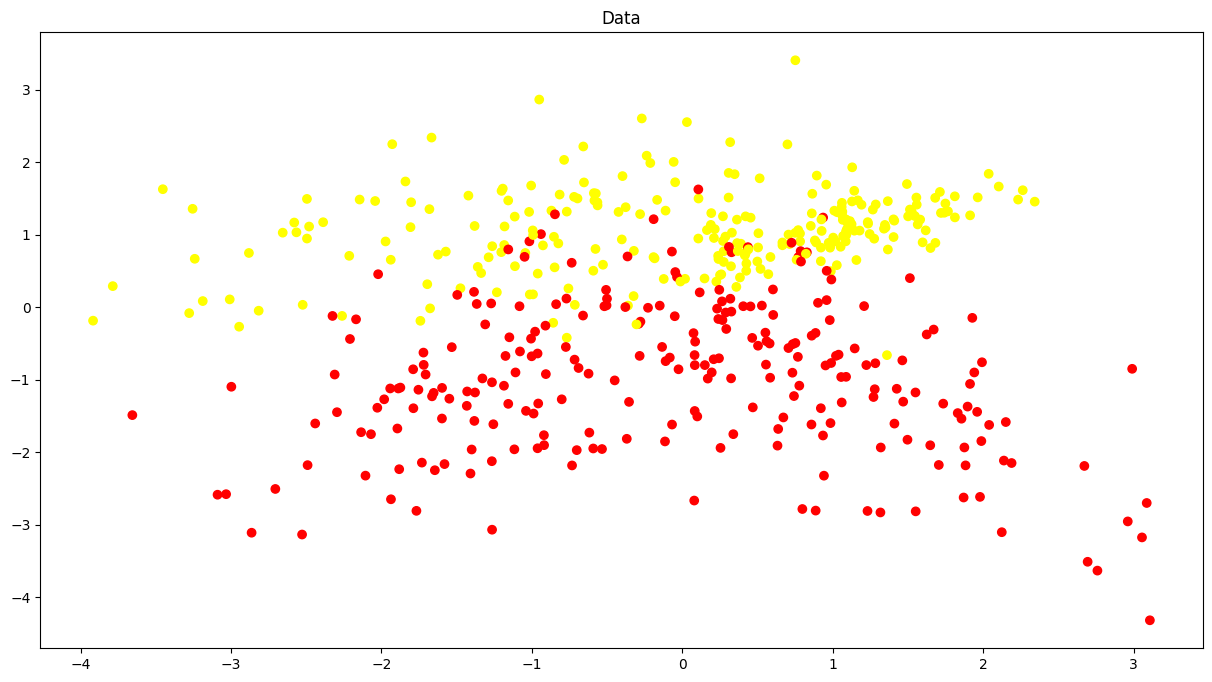

In [18]:
X, y = make_classification(n_samples=500, n_classes=2, n_features=2, n_informative=2, n_redundant=0)
print(X)
plt.figure(figsize=(15, 8))
plt.scatter(X[:,0], X[:,1], c=y, cmap='autumn')
plt.title("Data")
plt.show()

In [22]:
X[y == 0]

array([[-1.65269472e+00, -1.18352871e+00],
       [-1.38428736e+00,  2.09412477e-01],
       [-1.54832311e+00, -1.26380017e+00],
       [ 2.12373479e+00, -3.10488598e+00],
       [ 9.21051657e-01, -1.39529106e+00],
       [ 9.59434608e-01,  9.58280548e-02],
       [-1.88157648e+00, -2.23622790e+00],
       [-1.39987360e+00, -1.96439203e+00],
       [-9.19677699e-01, -1.76716653e+00],
       [ 3.10813783e+00, -4.31958709e+00],
       [-1.18523263e+00, -1.08506315e+00],
       [-1.10735202e-01, -7.45840796e-01],
       [-9.09518385e-01, -2.56622322e-01],
       [ 2.03977625e+00, -1.62556372e+00],
       [-1.32851323e+00, -9.84395315e-01],
       [-5.03329161e-01,  2.33653410e-02],
       [ 1.88294783e+00, -2.18349498e+00],
       [-1.72047644e+00, -6.28005498e-01],
       [ 8.26379105e-02, -1.43318195e+00],
       [-1.11613478e+00, -1.96219643e+00],
       [-1.58047532e+00, -2.16562409e+00],
       [-3.68917269e-01, -1.81690828e+00],
       [ 3.39241984e-01, -1.75293264e+00],
       [ 1.

In [5]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3, shuffle=True)
dforest = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=35)
dforest.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=35)

In [28]:
from sklearn.metrics import accuracy_score, f1_score

y_pred = dforest.predict(X_test)
accuracy_score(y_true=y_test, y_pred=y_pred)

0.96

In [29]:
f1_score(y_true=y_test, y_pred=y_pred)

0.9647058823529412

In [7]:
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=35)
clf = GridSearchCV(rfc, param_grid={
	'n_estimators':[100, 500], 'max_depth':[2, 4, 6], 'min_samples_leaf':[1, 3, 5]
  })

clf.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(max_depth=3, random_state=35),
             param_grid={'max_depth': [2, 4, 6], 'min_samples_leaf': [1, 3, 5],
                         'n_estimators': [100, 500]})

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = clf.predict(X_test)
accuracy_score(y_true=y_test, y_pred=y_pred)

0.9666666666666667

In [31]:
f1_score(y_true=y_test, y_pred=y_pred)

0.9704142011834319

In [32]:
cf_matrix = confusion_matrix(y_pred=y_pred, y_true=y_test)
cf_matrix

array([[63,  5],
       [ 0, 82]], dtype=int64)

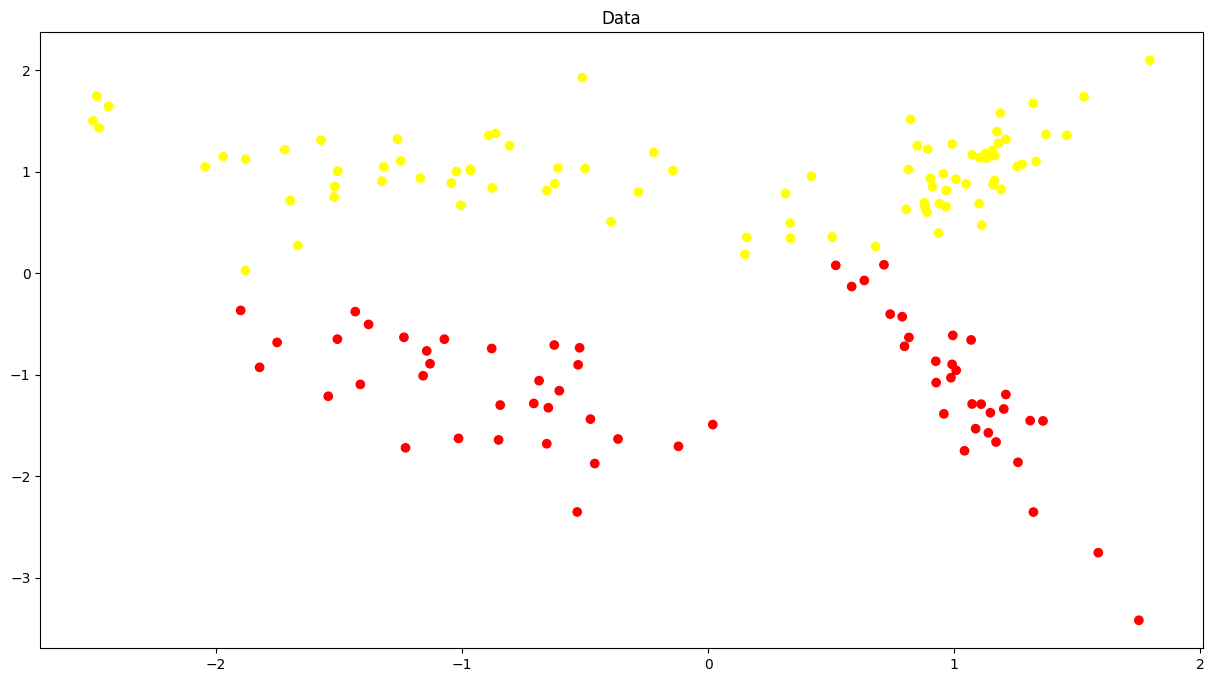

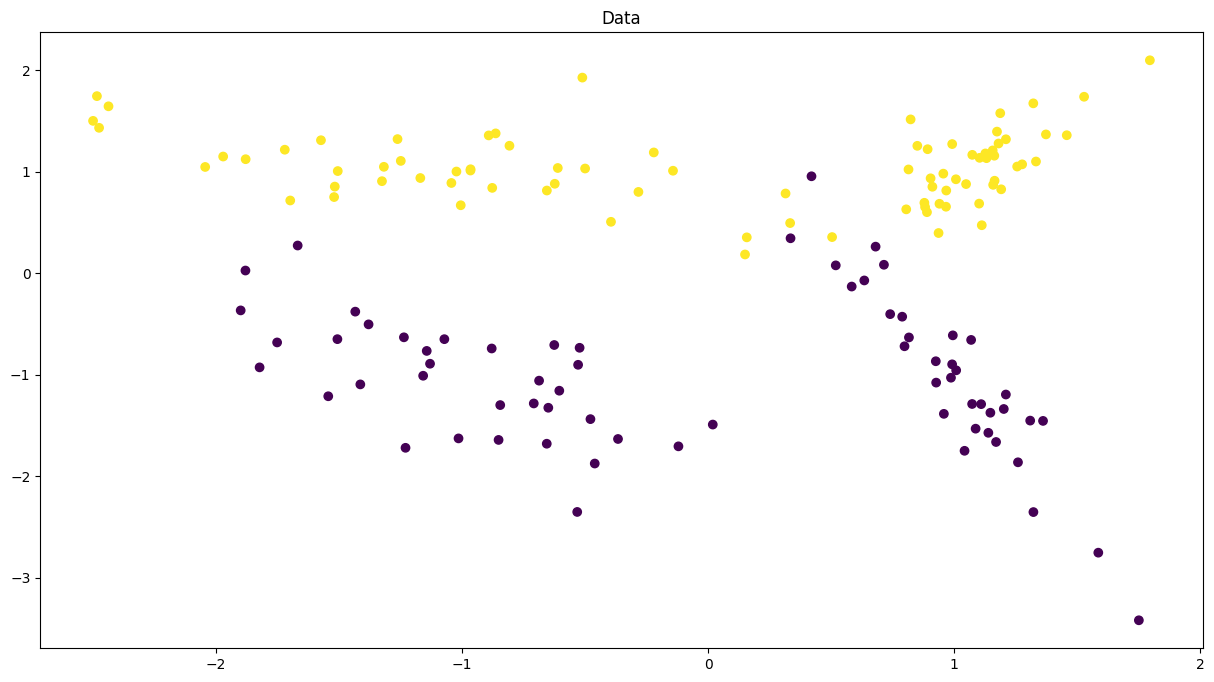

In [10]:
plt.figure(figsize=(15, 8))
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred, cmap='autumn')
plt.title("Data")

plt.figure(figsize=(15, 8))
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap='viridis')
plt.title("Data")

plt.show()

In [11]:
fn = (y_test == 1) & (y_pred == 0)
fp = (y_test == 0) & (y_pred == 1)

X_w = X_test[fn | fp]
Y_w = y_test[fn | fp]
print(X_w)
print(Y_w)

[[-1.88109643  0.02461715]
 [ 0.42051826  0.95315848]
 [-1.66870742  0.27110637]
 [ 0.33533717  0.34235727]
 [ 0.68115657  0.26000607]]
[0 0 0 0 0]


Text(0.5, 1.0, 'Data FP')

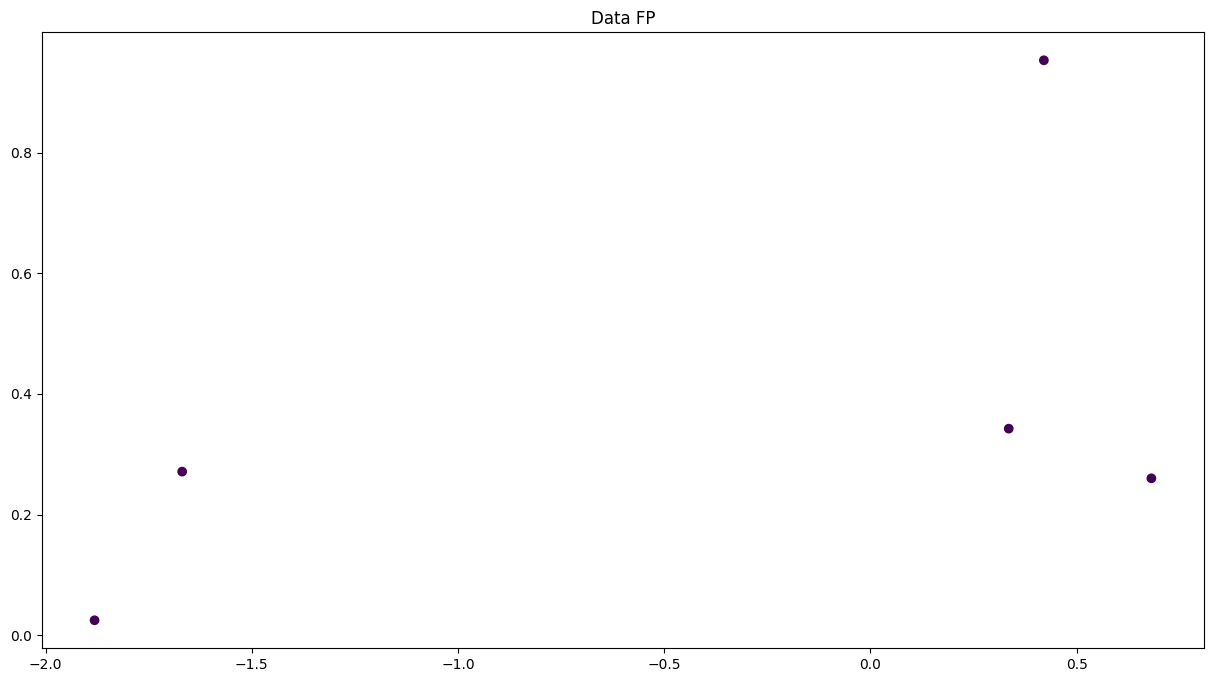

In [12]:
plt.figure(figsize=(15, 8))
plt.scatter(X_w[:,0], X_w[:,1], c=Y_w, cmap='viridis')
plt.title("Data FP")

#
MSE = 